# Role Framing Experiment Analysis Report

This notebook analyzes decision-making patterns across different job position levels when LLMs are role-framed.

## Research Question
Do LLMs exhibit systematic cognitive or decision biases when they are role-framed—for example, told to "act as a CEO" vs "act as an intern"?

## Methodology
- **Scenarios**: 5 decision-making scenarios across diverse domains
- **Roles**: 6 role framings (Higher Executive, Middle Manager, Intern, Technical Expert, Compliance Officer, Neutral)
- **Models**: GPT-4.1 Mini and Claude 3.7 Sonnet
- **Evaluation**: LLM-as-Judge scores on 5 dimensions (1-10 scale)
  - Rationality, Comprehensiveness, Analytical Depth, Integrity, Bias Mitigation


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load data - update this path to your analysis CSV file
# The analysis CSV is generated by running: python src/analyze_results.py results/experiment_<run_id>.json
df = pd.read_csv('results/analysis_3f41f5d0.csv')  # Change to your analysis file

# Clean and prepare data
df['scenario'] = df['scenario'].str.replace('_', ' ').str.title()
df['role'] = df['role'].str.replace('_', ' ').str.title()
df['model'] = df['model'].str.replace('-', ' ').str.title()

print(f"Dataset shape: {df.shape}")
print(f"\nScenarios: {df['scenario'].unique().tolist()}")
print(f"\nRoles: {df['role'].unique().tolist()}")
print(f"\nModels: {df['model'].unique().tolist()}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (600, 11)

Scenarios: ['Pricing Strategy', 'Hiring Decision', 'Crisis Response', 'Ai Deployment Ethics', 'Data Privacy Tradeoff']

Roles: ['Higher Executive', 'Middle Manager', 'Intern', 'Technical Expert', 'Compliance Officer', 'Neutral']

Models: ['Gpt 4.1 Mini', 'Claude 3.7 Sonnet']

First few rows:


,scenario,role,model,iteration,choice,rationality,comprehensiveness,analytical_depth,integrity,bias_mitigation,average_score
0,Pricing Strategy,Higher Executive,Gpt 4.1 Mini,1,A,5.0,5.0,5.0,5.0,4.0,4.8
1,Pricing Strategy,Higher Executive,Gpt 4.1 Mini,2,A,5.0,5.0,5.0,5.0,4.0,4.8
2,Pricing Strategy,Higher Executive,Gpt 4.1 Mini,3,A,5.0,5.0,5.0,5.0,4.0,4.8
3,Pricing Strategy,Higher Executive,Gpt 4.1 Mini,4,A,5.0,5.0,5.0,5.0,4.0,4.8
4,Pricing Strategy,Higher Executive,Gpt 4.1 Mini,5,A,5.0,5.0,5.0,5.0,4.0,4.8


## 1. Average Score by Model and Scenario


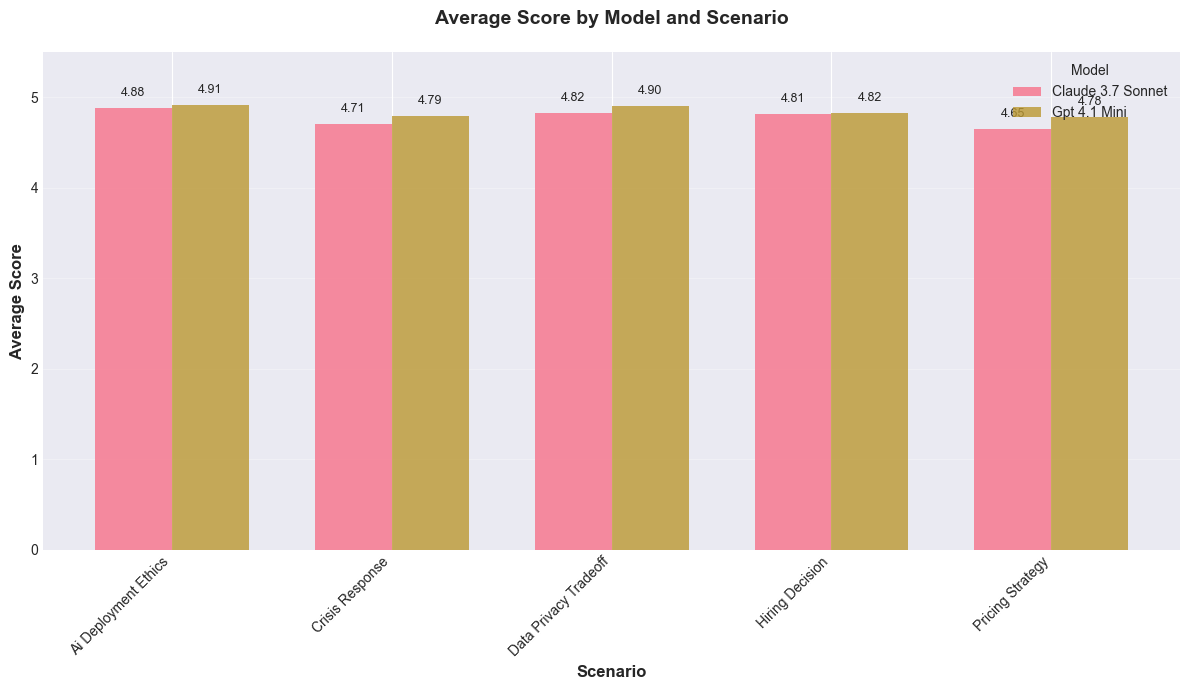


Average Scores by Model and Scenario:
model                  Claude 3.7 Sonnet  Gpt 4.1 Mini
scenario                                              
Ai Deployment Ethics                4.88          4.91
Crisis Response                     4.71          4.79
Data Privacy Tradeoff               4.82          4.90
Hiring Decision                     4.81          4.82
Pricing Strategy                    4.65          4.78


In [ ]:
# Calculate average scores by model and scenario
avg_scores = df.groupby(['model', 'scenario'])['average_score'].mean().reset_index()
avg_scores_pivot = avg_scores.pivot(index='scenario', columns='model', values='average_score')

# Create visualization
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(avg_scores_pivot.index))
width = 0.35

models = avg_scores_pivot.columns.tolist()
for i, model in enumerate(models):
    offset = (i - len(models)/2 + 0.5) * width
    ax.bar(x + offset, avg_scores_pivot[model], width, label=model, alpha=0.8)

ax.set_xlabel('Scenario', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=12, fontweight='bold')
ax.set_title('Average Score by Model and Scenario', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(avg_scores_pivot.index, rotation=45, ha='right')
ax.legend(title='Model', fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 11])

# Add value labels on bars
for i, model in enumerate(models):
    offset = (i - len(models)/2 + 0.5) * width
    for j, val in enumerate(avg_scores_pivot[model]):
        ax.text(j + offset, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary table
print("\nAverage Scores by Model and Scenario:")
print(avg_scores_pivot.round(2))


## 2. Choice Distribution by Model


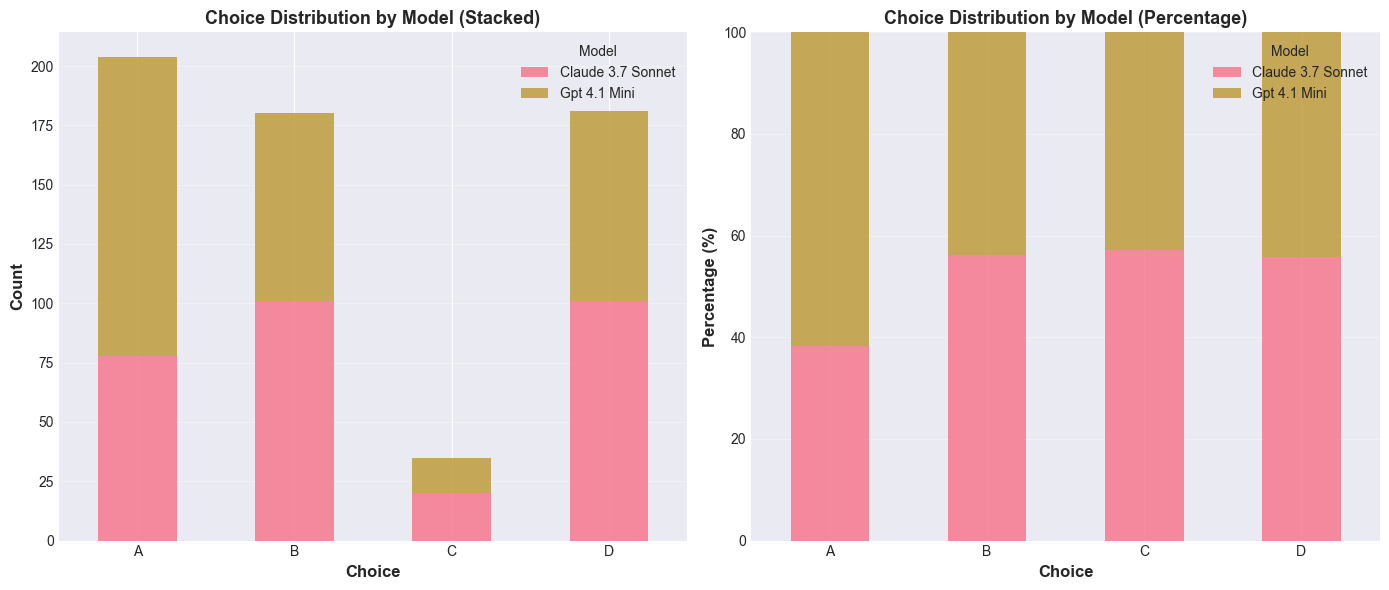


Choice Counts by Model:
model   Claude 3.7 Sonnet  Gpt 4.1 Mini
choice                                 
A                      78           126
B                     101            79
C                      20            15
D                     101            80

Choice Percentages by Model:
model   Claude 3.7 Sonnet  Gpt 4.1 Mini
choice                                 
A                    38.2          61.8
B                    56.1          43.9
C                    57.1          42.9
D                    55.8          44.2


In [3]:
# Filter out empty choices
df_choices = df[df['choice'].notna() & (df['choice'] != '')]

# Count choices by model
choice_counts = df_choices.groupby(['model', 'choice']).size().reset_index(name='count')
choice_pivot = choice_counts.pivot(index='choice', columns='model', values='count').fillna(0)

# Create stacked bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar chart
choice_pivot.plot(kind='bar', stacked=True, ax=ax1, alpha=0.8)
ax1.set_xlabel('Choice', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('Choice Distribution by Model (Stacked)', fontsize=13, fontweight='bold')
ax1.legend(title='Model', fontsize=10)
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticklabels(choice_pivot.index, rotation=0)

# Percentage stacked bar chart
choice_pct = choice_pivot.div(choice_pivot.sum(axis=1), axis=0) * 100
choice_pct.plot(kind='bar', stacked=True, ax=ax2, alpha=0.8)
ax2.set_xlabel('Choice', fontsize=12, fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('Choice Distribution by Model (Percentage)', fontsize=13, fontweight='bold')
ax2.legend(title='Model', fontsize=10)
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticklabels(choice_pct.index, rotation=0)
ax2.set_ylim([0, 100])

plt.tight_layout()
plt.show()

# Print summary table
print("\nChoice Counts by Model:")
print(choice_pivot)
print("\nChoice Percentages by Model:")
print(choice_pct.round(1))


## 3. Average Score by Role (Job Position Level)


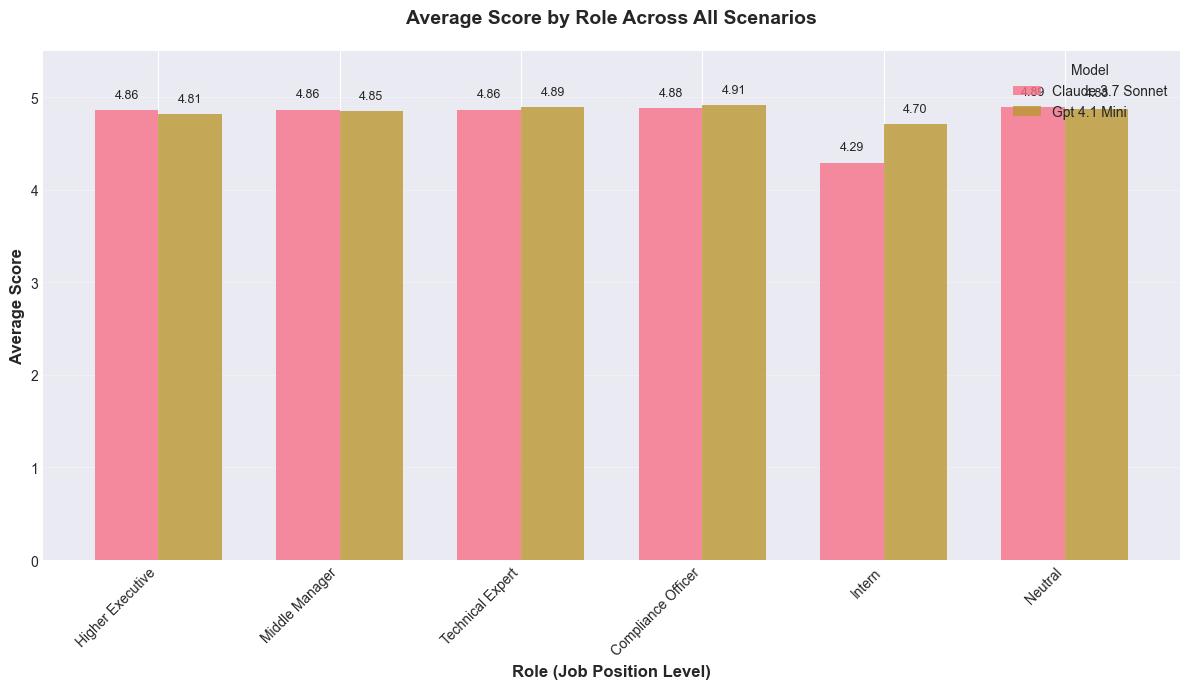


Average Scores by Role:
model               Claude 3.7 Sonnet  Gpt 4.1 Mini
role                                               
Higher Executive                 4.86          4.81
Middle Manager                   4.86          4.85
Technical Expert                 4.86          4.89
Compliance Officer               4.88          4.91
Intern                           4.29          4.70
Neutral                          4.89          4.88


In [ ]:
# Calculate average scores by role
role_scores = df.groupby(['role', 'model'])['average_score'].mean().reset_index()
role_pivot = role_scores.pivot(index='role', columns='model', values='average_score')

# Order roles by hierarchy (if desired)
role_order = ['Higher Executive', 'Middle Manager', 'Technical Expert', 'Compliance Officer', 'Intern', 'Neutral']
role_pivot = role_pivot.reindex([r for r in role_order if r in role_pivot.index])

# Create visualization
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(role_pivot.index))
width = 0.35

models = role_pivot.columns.tolist()
for i, model in enumerate(models):
    offset = (i - len(models)/2 + 0.5) * width
    ax.bar(x + offset, role_pivot[model], width, label=model, alpha=0.8)

ax.set_xlabel('Role (Job Position Level)', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=12, fontweight='bold')
ax.set_title('Average Score by Role Across All Scenarios', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(role_pivot.index, rotation=45, ha='right')
ax.legend(title='Model', fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 11])

# Add value labels
for i, model in enumerate(models):
    offset = (i - len(models)/2 + 0.5) * width
    for j, val in enumerate(role_pivot[model]):
        ax.text(j + offset, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nAverage Scores by Role:")
print(role_pivot.round(2))


## 4. Choice Distribution by Role and Scenario


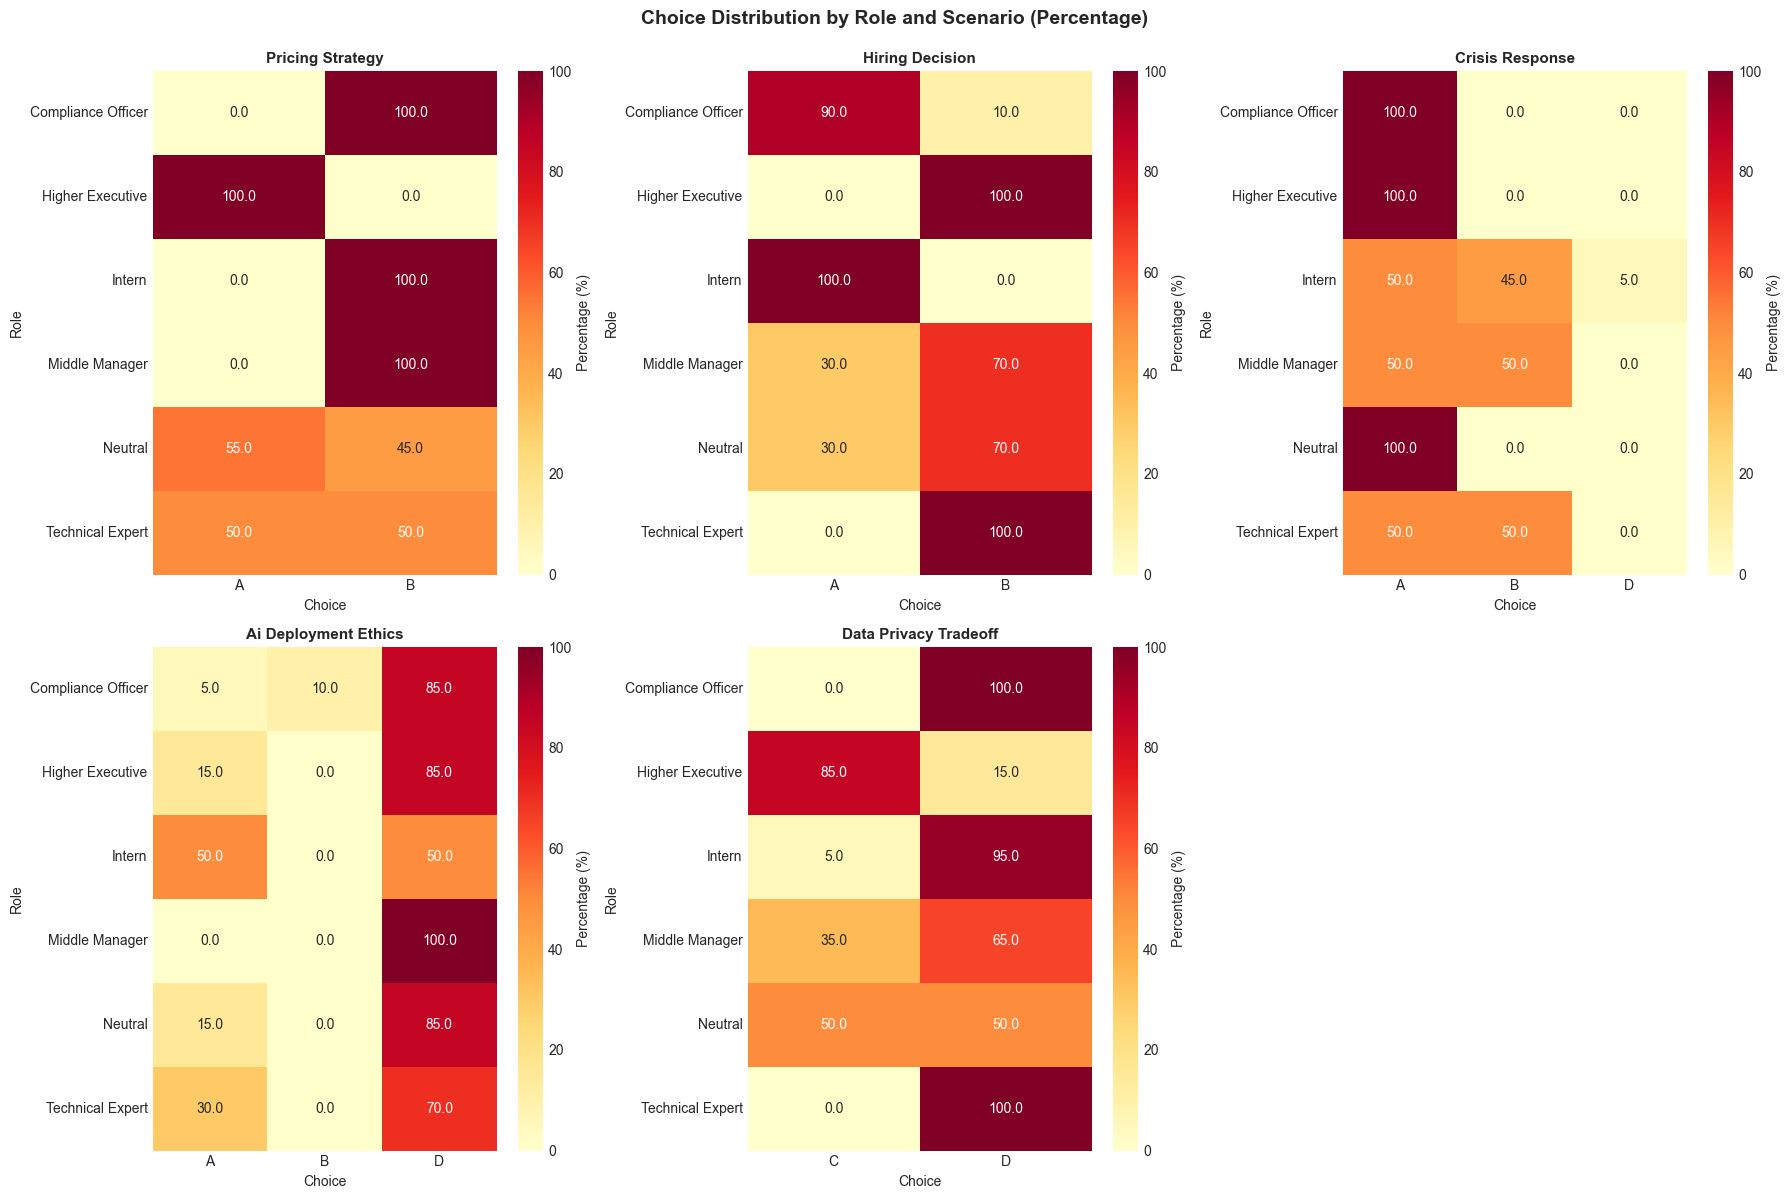

In [5]:
# Choice distribution by role and scenario
df_choices = df[df['choice'].notna() & (df['choice'] != '')]

# Create heatmap of choice distribution
choice_by_role_scenario = df_choices.groupby(['role', 'scenario', 'choice']).size().reset_index(name='count')

# For each scenario, show choice distribution by role
scenarios = df_choices['scenario'].unique()
n_scenarios = len(scenarios)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, scenario in enumerate(scenarios):
    ax = axes[idx]
    scenario_data = choice_by_role_scenario[choice_by_role_scenario['scenario'] == scenario]
    
    # Create pivot table
    pivot_data = scenario_data.pivot_table(
        index='role', 
        columns='choice', 
        values='count', 
        fill_value=0
    )
    
    # Normalize to percentages
    pivot_pct = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
    
    # Plot heatmap
    sns.heatmap(pivot_pct, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Percentage (%)'})
    ax.set_title(f'{scenario}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Choice', fontsize=10)
    ax.set_ylabel('Role', fontsize=10)

# Remove extra subplot
if n_scenarios < len(axes):
    axes[n_scenarios].axis('off')

plt.suptitle('Choice Distribution by Role and Scenario (Percentage)', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## 5. Score Distribution by Role (Box Plot)


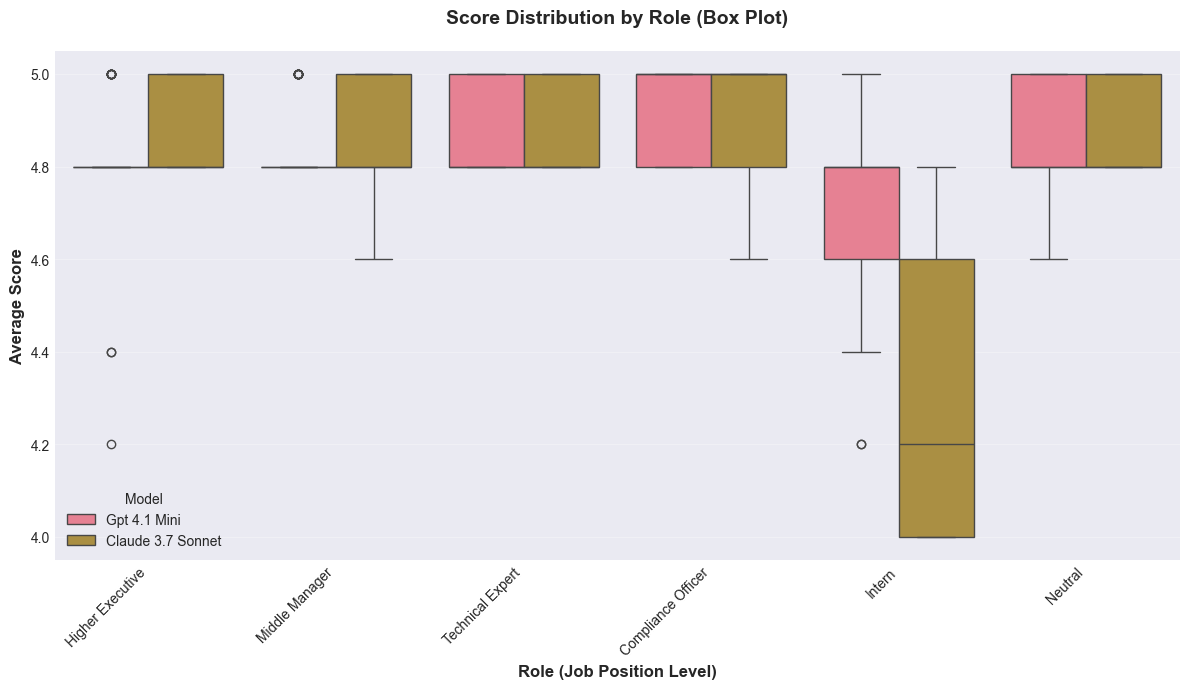

In [6]:
# Box plot showing score distribution by role
fig, ax = plt.subplots(figsize=(12, 7))

# Order roles
role_order = ['Higher Executive', 'Middle Manager', 'Technical Expert', 'Compliance Officer', 'Intern', 'Neutral']
df_ordered = df.copy()
df_ordered['role'] = pd.Categorical(df_ordered['role'], categories=role_order, ordered=True)
df_ordered = df_ordered.sort_values('role')

sns.boxplot(data=df_ordered, x='role', y='average_score', hue='model', ax=ax)
ax.set_xlabel('Role (Job Position Level)', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=12, fontweight='bold')
ax.set_title('Score Distribution by Role (Box Plot)', fontsize=14, fontweight='bold', pad=20)
ax.legend(title='Model', fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


## 6. Evaluation Dimensions Breakdown by Role


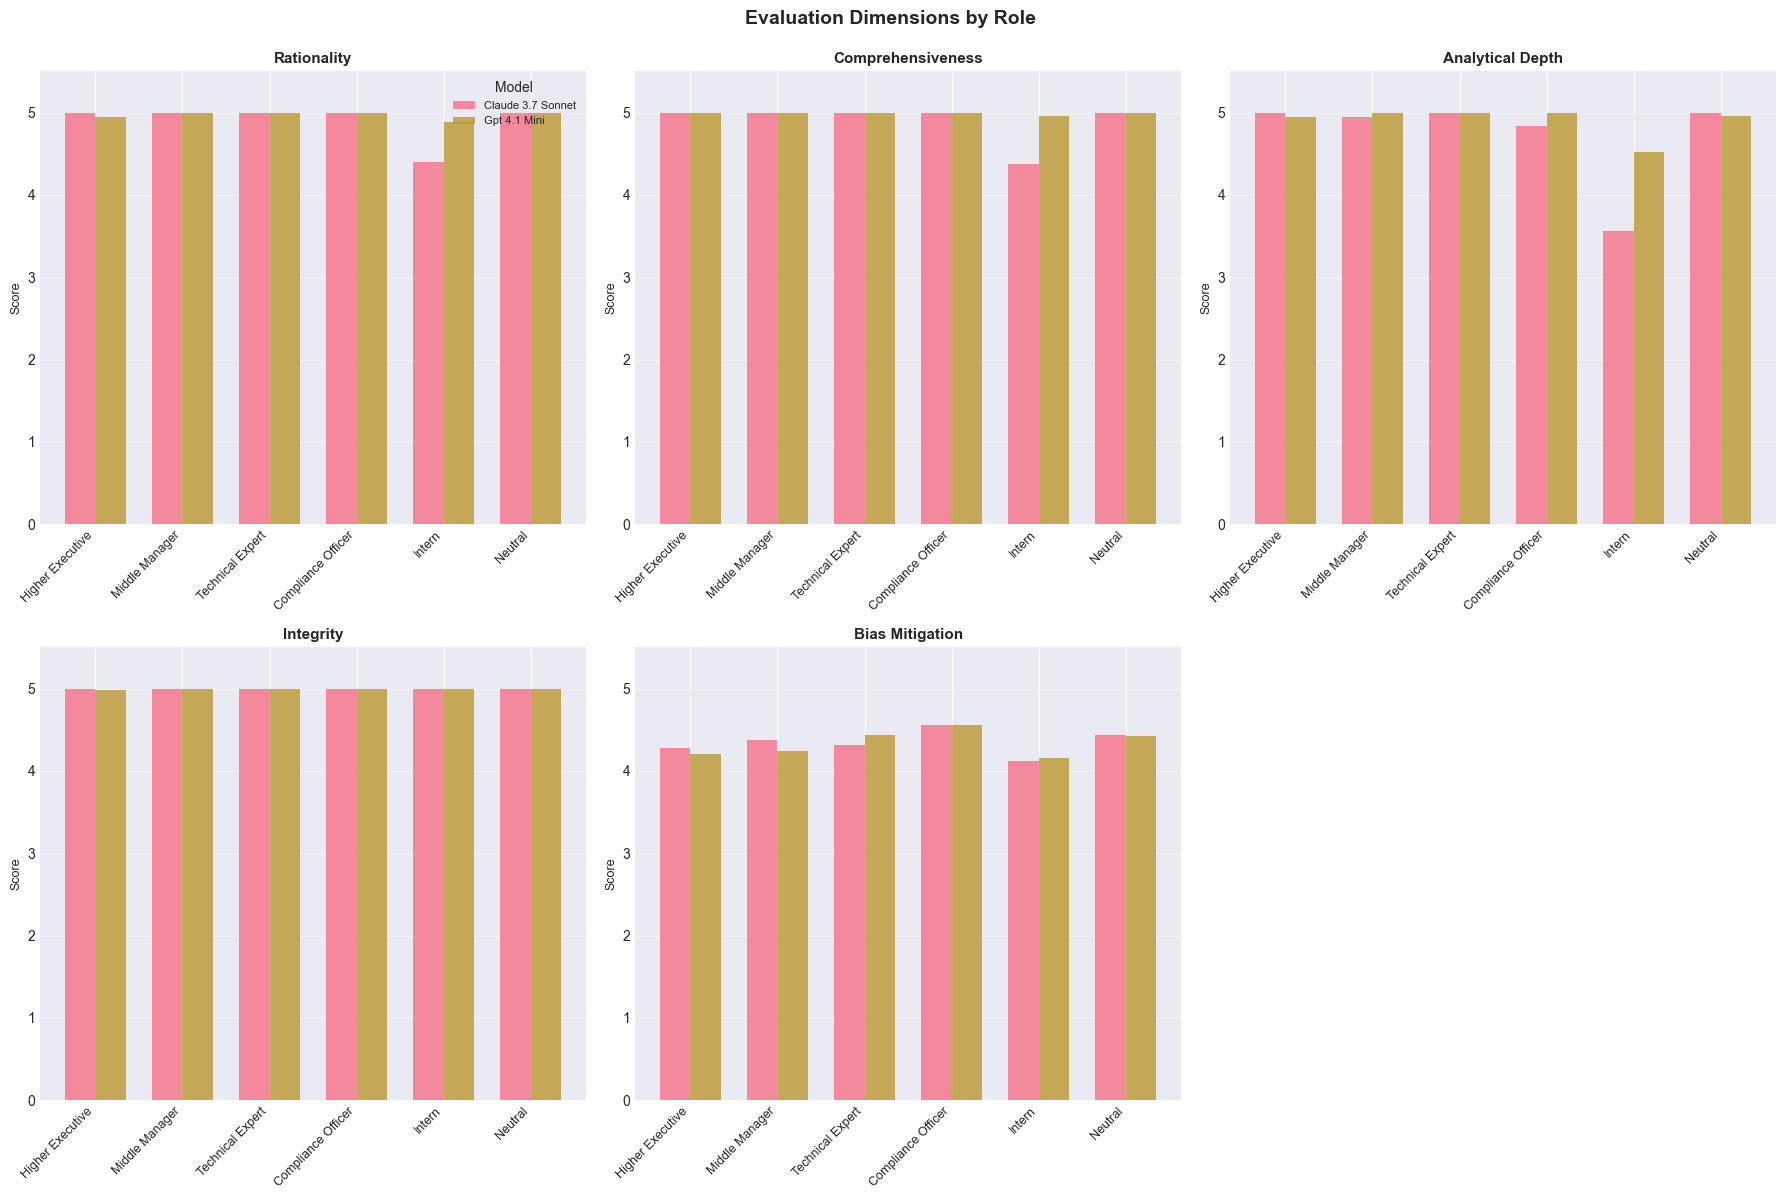

In [ ]:
# Analyze each evaluation dimension by role
dimensions = ['rationality', 'comprehensiveness', 'analytical_depth', 'integrity', 'bias_mitigation']
dimension_names = [d.replace('_', ' ').title() for d in dimensions]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (dim, dim_name) in enumerate(zip(dimensions, dimension_names)):
    ax = axes[idx]
    
    # Calculate average by role and model
    dim_scores = df.groupby(['role', 'model'])[dim].mean().reset_index()
    dim_pivot = dim_scores.pivot(index='role', columns='model', values=dim)
    
    # Order roles
    role_order = ['Higher Executive', 'Middle Manager', 'Technical Expert', 'Compliance Officer', 'Intern', 'Neutral']
    dim_pivot = dim_pivot.reindex([r for r in role_order if r in dim_pivot.index])
    
    # Plot
    x = np.arange(len(dim_pivot.index))
    width = 0.35
    models = dim_pivot.columns.tolist()
    
    for i, model in enumerate(models):
        offset = (i - len(models)/2 + 0.5) * width
        ax.bar(x + offset, dim_pivot[model], width, label=model, alpha=0.8)
    
    ax.set_title(dim_name, fontsize=11, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(dim_pivot.index, rotation=45, ha='right', fontsize=9)
    ax.set_ylabel('Score', fontsize=9)
    ax.set_ylim([0, 11])
    ax.grid(axis='y', alpha=0.3)
    if idx == 0:
        ax.legend(title='Model', fontsize=8)

# Remove last subplot
axes[-1].axis('off')

plt.suptitle('Evaluation Dimensions by Role', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## 7. Role vs Neutral Baseline Comparison


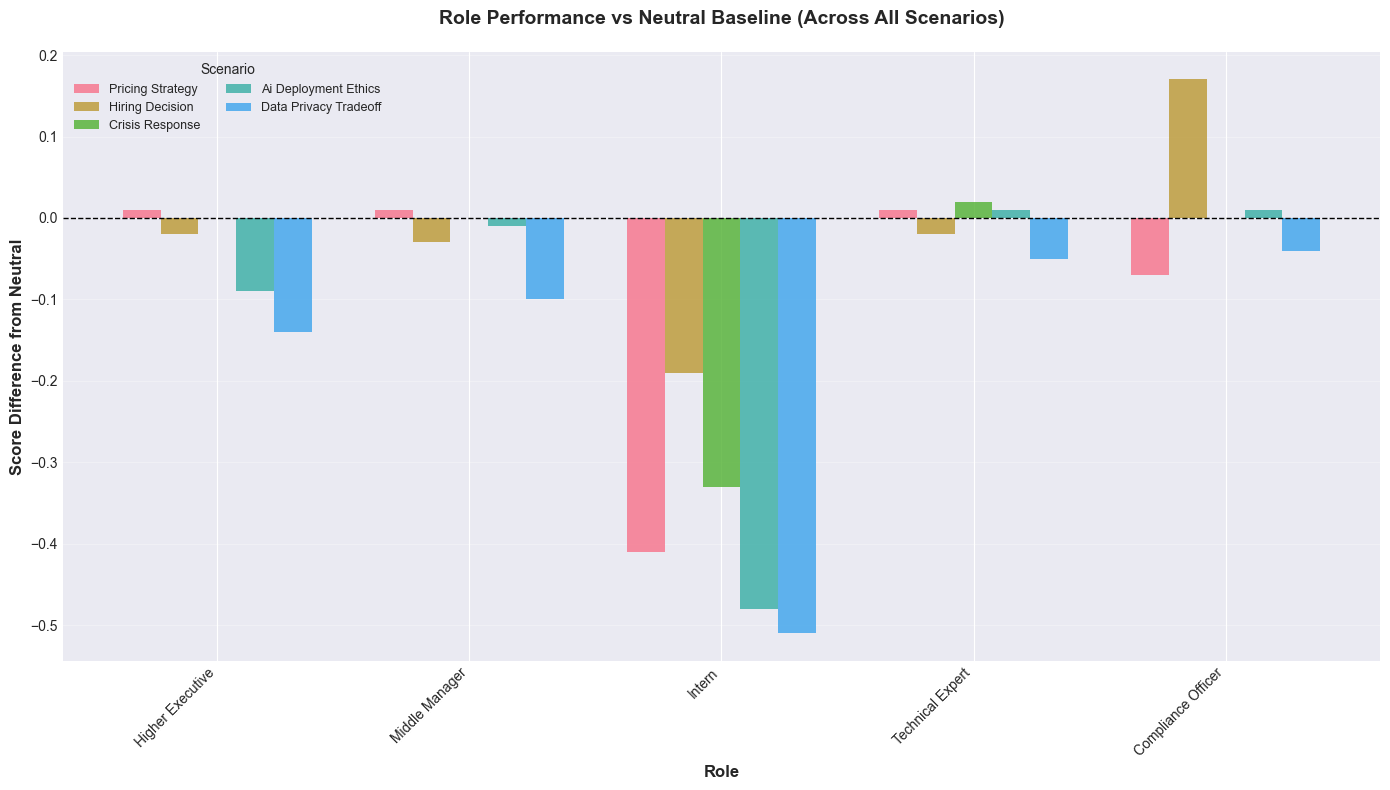


Detailed Comparison vs Neutral Baseline:
Higher Executive          | Avg Score: 4.83 | Diff from Neutral: -0.05
Middle Manager            | Avg Score: 4.86 | Diff from Neutral: -0.03
Intern                    | Avg Score: 4.50 | Diff from Neutral: -0.38
Technical Expert          | Avg Score: 4.88 | Diff from Neutral: -0.01
Compliance Officer        | Avg Score: 4.90 | Diff from Neutral: +0.01


In [8]:
# Compare each role against neutral baseline
neutral_scores = df[df['role'] == 'Neutral'].groupby(['scenario', 'model'])['average_score'].mean()

# Calculate differences for each role
roles_to_compare = [r for r in df['role'].unique() if r != 'Neutral']

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(roles_to_compare))
width = 0.15
scenarios = df['scenario'].unique()

for i, scenario in enumerate(scenarios):
    offsets = []
    for role in roles_to_compare:
        role_scores = df[(df['role'] == role) & (df['scenario'] == scenario)].groupby('model')['average_score'].mean()
        neutral_avg = df[(df['role'] == 'Neutral') & (df['scenario'] == scenario)].groupby('model')['average_score'].mean()
        
        # Average across models
        diff = role_scores.mean() - neutral_avg.mean()
        offsets.append(diff)
    
    offset = (i - len(scenarios)/2 + 0.5) * width
    ax.bar(x + offset, offsets, width, label=scenario, alpha=0.8)

ax.set_xlabel('Role', fontsize=12, fontweight='bold')
ax.set_ylabel('Score Difference from Neutral', fontsize=12, fontweight='bold')
ax.set_title('Role Performance vs Neutral Baseline (Across All Scenarios)', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(roles_to_compare, rotation=45, ha='right')
ax.legend(title='Scenario', fontsize=9, ncol=2)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed comparison
print("\nDetailed Comparison vs Neutral Baseline:")
for role in roles_to_compare:
    role_avg = df[df['role'] == role].groupby('model')['average_score'].mean().mean()
    neutral_avg = df[df['role'] == 'Neutral'].groupby('model')['average_score'].mean().mean()
    diff = role_avg - neutral_avg
    print(f"{role:25} | Avg Score: {role_avg:.2f} | Diff from Neutral: {diff:+.2f}")


## 8. Heatmap: Average Scores by Role and Scenario


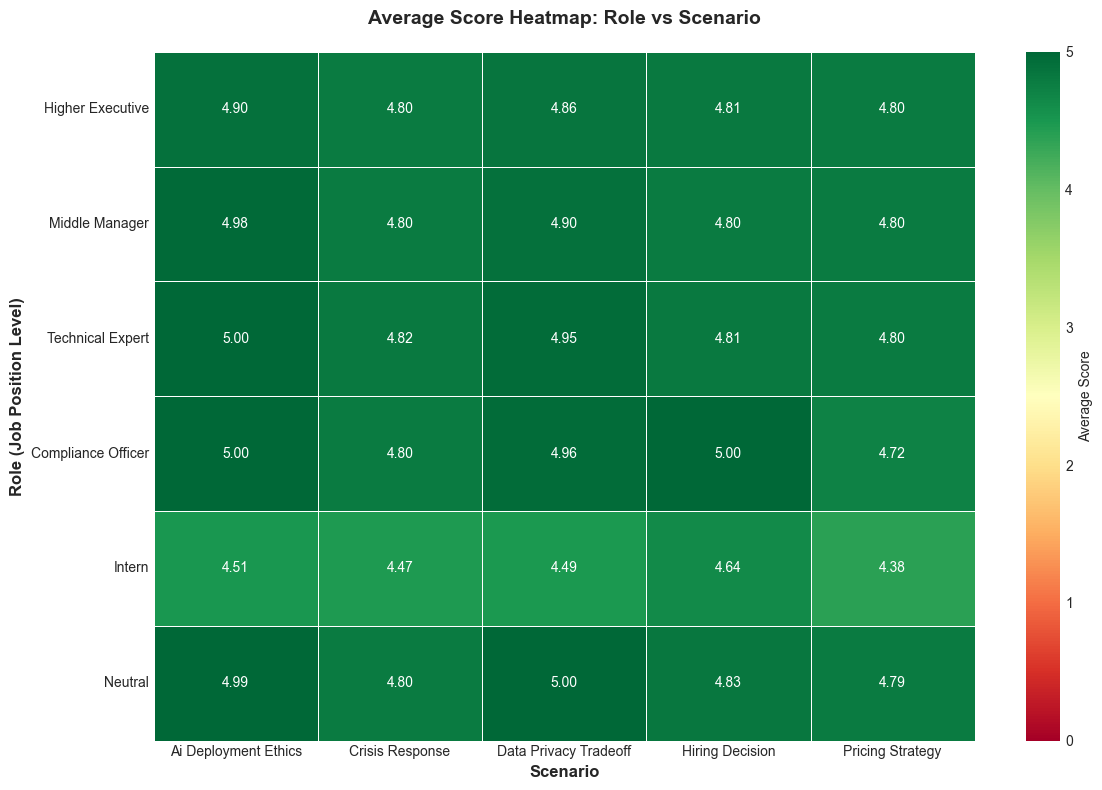


Average Scores by Role and Scenario:
scenario            Ai Deployment Ethics  Crisis Response  \
role                                                        
Higher Executive                    4.90             4.80   
Middle Manager                      4.98             4.80   
Technical Expert                    5.00             4.82   
Compliance Officer                  5.00             4.80   
Intern                              4.51             4.47   
Neutral                             4.99             4.80   

scenario            Data Privacy Tradeoff  Hiring Decision  Pricing Strategy  
role                                                                          
Higher Executive                     4.86             4.81              4.80  
Middle Manager                       4.90             4.80              4.80  
Technical Expert                     4.95             4.81              4.80  
Compliance Officer                   4.96             5.00              4.72  

In [ ]:
# Create heatmap of average scores by role and scenario
heatmap_data = df.groupby(['role', 'scenario'])['average_score'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='role', columns='scenario', values='average_score')

# Order roles
role_order = ['Higher Executive', 'Middle Manager', 'Technical Expert', 'Compliance Officer', 'Intern', 'Neutral']
heatmap_pivot = heatmap_pivot.reindex([r for r in role_order if r in heatmap_pivot.index])

# Create visualization
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt='.2f', cmap='RdYlGn', vmin=0, vmax=10, ax=ax, 
            cbar_kws={'label': 'Average Score'}, linewidths=0.5)
ax.set_xlabel('Scenario', fontsize=12, fontweight='bold')
ax.set_ylabel('Role (Job Position Level)', fontsize=12, fontweight='bold')
ax.set_title('Average Score Heatmap: Role vs Scenario', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\nAverage Scores by Role and Scenario:")
print(heatmap_pivot.round(2))


## 9. Choice Consistency Analysis


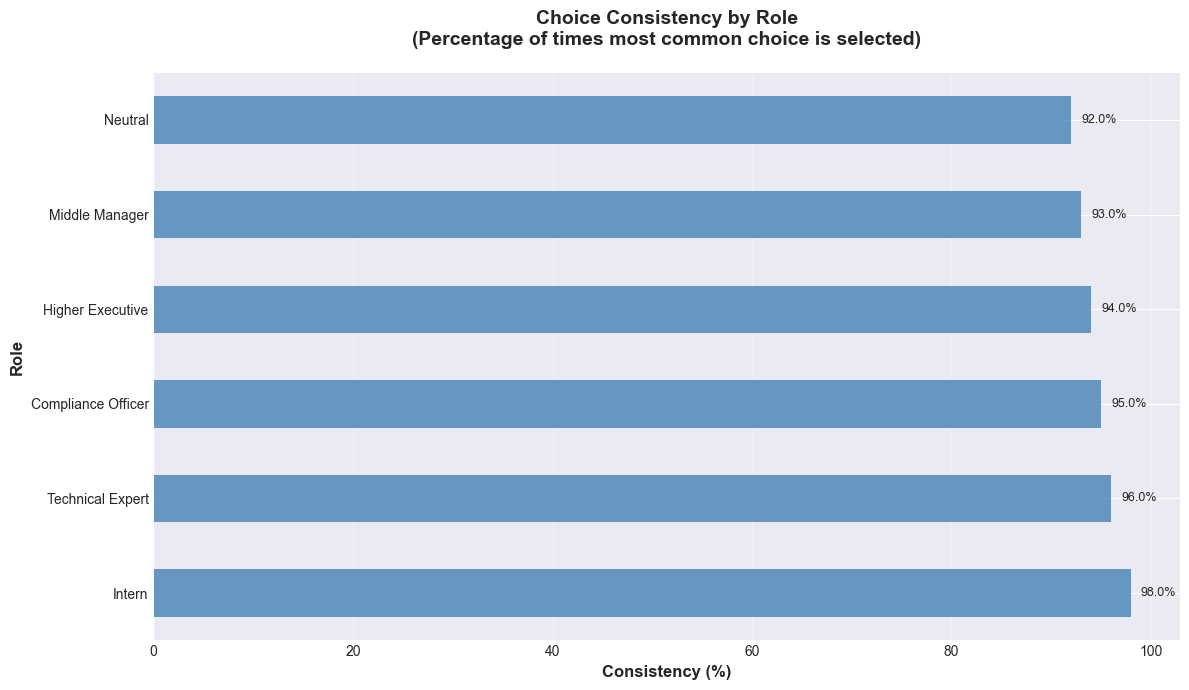


Choice Consistency by Role:
role
Intern                98.0
Technical Expert      96.0
Compliance Officer    95.0
Higher Executive      94.0
Middle Manager        93.0
Neutral               92.0
Name: consistency, dtype: float64


In [10]:
# Analyze choice consistency - how often each role picks the same choice across iterations
df_choices = df[df['choice'].notna() & (df['choice'] != '')]

# Calculate choice consistency (entropy-based measure)
consistency_data = []
for role in df_choices['role'].unique():
    for scenario in df_choices['scenario'].unique():
        for model in df_choices['model'].unique():
            subset = df_choices[(df_choices['role'] == role) & 
                              (df_choices['scenario'] == scenario) & 
                              (df_choices['model'] == model)]
            if len(subset) > 0:
                choice_counts = subset['choice'].value_counts()
                # Calculate most common choice percentage
                most_common_pct = (choice_counts.iloc[0] / len(subset)) * 100
                consistency_data.append({
                    'role': role,
                    'scenario': scenario,
                    'model': model,
                    'consistency': most_common_pct,
                    'most_common_choice': choice_counts.index[0]
                })

consistency_df = pd.DataFrame(consistency_data)

# Average consistency by role
role_consistency = consistency_df.groupby('role')['consistency'].mean().sort_values(ascending=False)

# Visualization
fig, ax = plt.subplots(figsize=(12, 7))
role_consistency.plot(kind='barh', ax=ax, color='steelblue', alpha=0.8)
ax.set_xlabel('Consistency (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Role', fontsize=12, fontweight='bold')
ax.set_title('Choice Consistency by Role\n(Percentage of times most common choice is selected)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, val in enumerate(role_consistency):
    ax.text(val + 1, i, f'{val:.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\nChoice Consistency by Role:")
print(role_consistency.round(1))


## 10. Model Comparison: GPT vs Claude


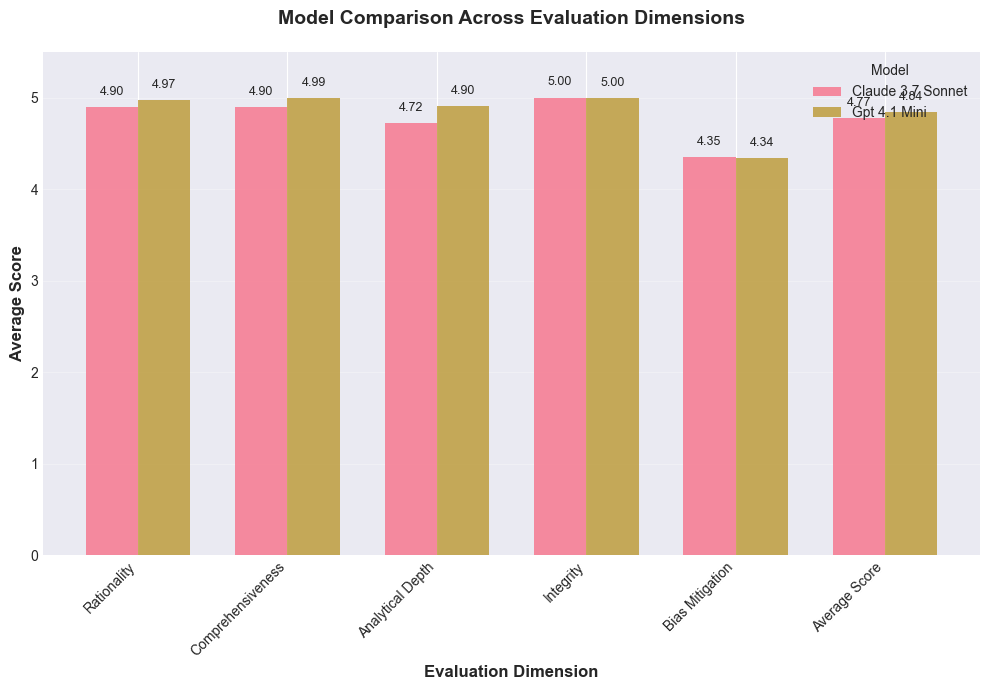


Model Comparison:
model              Claude 3.7 Sonnet  Gpt 4.1 Mini
rationality                     4.90          4.97
comprehensiveness               4.90          4.99
analytical_depth                4.72          4.90
integrity                       5.00          5.00
bias_mitigation                 4.35          4.34
average_score                   4.77          4.84


In [ ]:
# Compare GPT and Claude across different dimensions
dimensions = ['rationality', 'comprehensiveness', 'analytical_depth', 'integrity', 'bias_mitigation', 'average_score']
dimension_names = [d.replace('_', ' ').title() for d in dimensions]

model_comparison = df.groupby('model')[dimensions].mean().T

# Create visualization
fig, ax = plt.subplots(figsize=(10, 7))
x = np.arange(len(dimension_names))
width = 0.35

models = model_comparison.columns.tolist()
for i, model in enumerate(models):
    offset = (i - len(models)/2 + 0.5) * width
    ax.bar(x + offset, model_comparison[model], width, label=model, alpha=0.8)

ax.set_xlabel('Evaluation Dimension', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Score', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison Across Evaluation Dimensions', fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(dimension_names, rotation=45, ha='right')
ax.legend(title='Model', fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 11])

# Add value labels
for i, model in enumerate(models):
    offset = (i - len(models)/2 + 0.5) * width
    for j, val in enumerate(model_comparison[model]):
        ax.text(j + offset, val + 0.1, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nModel Comparison:")
print(model_comparison.round(2))


## Summary Statistics


In [12]:
# Overall summary statistics
print("=" * 80)
print("EXPERIMENT SUMMARY STATISTICS")
print("=" * 80)

print(f"\nTotal Responses: {len(df)}")
print(f"Total Scenarios: {df['scenario'].nunique()}")
print(f"Total Roles: {df['role'].nunique()}")
print(f"Total Models: {df['model'].nunique()}")
print(f"Iterations per combination: {df.groupby(['scenario', 'role', 'model']).size().iloc[0]}")

print("\n" + "-" * 80)
print("OVERALL AVERAGE SCORES")
print("-" * 80)
print(f"\nOverall Average Score: {df['average_score'].mean():.2f}")
print(f"Standard Deviation: {df['average_score'].std():.2f}")
print(f"Min Score: {df['average_score'].min():.2f}")
print(f"Max Score: {df['average_score'].max():.2f}")

print("\n" + "-" * 80)
print("AVERAGE SCORES BY ROLE")
print("-" * 80)
role_avg = df.groupby('role')['average_score'].mean().sort_values(ascending=False)
for role, score in role_avg.items():
    print(f"{role:25} | {score:.2f}")

print("\n" + "-" * 80)
print("AVERAGE SCORES BY MODEL")
print("-" * 80)
model_avg = df.groupby('model')['average_score'].mean().sort_values(ascending=False)
for model, score in model_avg.items():
    print(f"{model:25} | {score:.2f}")

print("\n" + "-" * 80)
print("AVERAGE SCORES BY SCENARIO")
print("-" * 80)
scenario_avg = df.groupby('scenario')['average_score'].mean().sort_values(ascending=False)
for scenario, score in scenario_avg.items():
    print(f"{scenario:30} | {score:.2f}")


EXPERIMENT SUMMARY STATISTICS

Total Responses: 600
Total Scenarios: 5
Total Roles: 6
Total Models: 2
Iterations per combination: 10

--------------------------------------------------------------------------------
OVERALL AVERAGE SCORES
--------------------------------------------------------------------------------

Overall Average Score: 4.81
Standard Deviation: 0.22
Min Score: 4.00
Max Score: 5.00

--------------------------------------------------------------------------------
AVERAGE SCORES BY ROLE
--------------------------------------------------------------------------------
Compliance Officer        | 4.90
Neutral                   | 4.88
Technical Expert          | 4.88
Middle Manager            | 4.86
Higher Executive          | 4.83
Intern                    | 4.50

--------------------------------------------------------------------------------
AVERAGE SCORES BY MODEL
--------------------------------------------------------------------------------
Gpt 4.1 Mini            